#Mileage prediction -Regression Analysis

##Objective
The objective of this project is to effeciently predict the mileage of different models of car using Regression Analysis.

##Data Source
The data source is taken from StatLibray which is maintained at Carneigie Mellon University


##Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import Data

In [7]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

##Data Describe


In [11]:
data.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

##Data Visualization

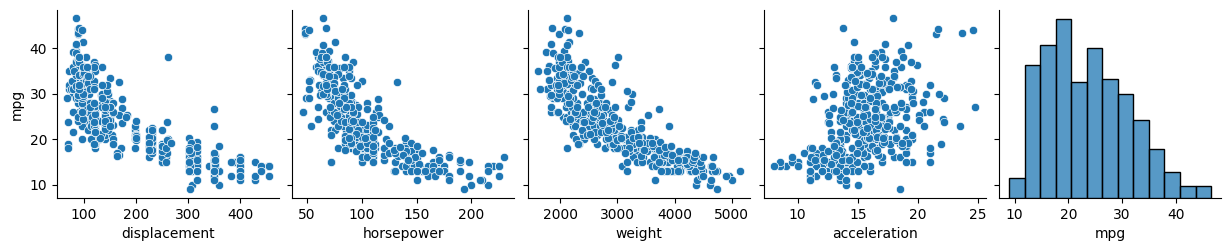

In [12]:
sns.pairplot(data,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

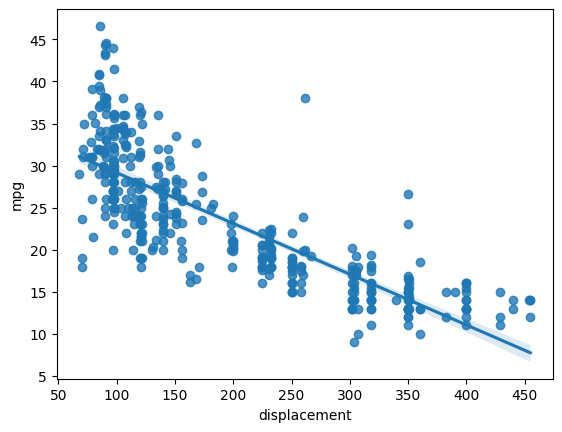

In [13]:
sns.regplot(x='displacement',y='mpg',data=data)

##Data Pre-Processing

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [31]:
data=data.dropna()

##Define Target Variable (y) and Feature Variables (X)

In [32]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [33]:
y=data['mpg']

In [34]:
y.shape

(392,)

In [35]:
X=data[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [36]:
X.shape

(392, 4)

In [37]:
X


,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


##Train Test Split Data

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

##Modelling

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
model.intercept_

45.10570942699835

In [43]:
model.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

In [44]:
y_pred=model.predict(X_test)

In [45]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

##Model Evaluation

In [49]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [50]:
mean_absolute_error(y_test,y_pred)

3.3286968643244115

In [51]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

#Prediction


In [52]:
y_pred=model.predict(X_test)

In [53]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

##Explanation
Data Collection: The dataset from StatLibrary contains information about various variables related to cars, including mileage, as well as other potential predictors such as engine size, weight, horsepower, and so on.

Data Preparation: The dataset needs to be cleaned and organized for analysis. This involves removing any missing or erroneous data, handling outliers, and ensuring that the variables are in the appropriate format for regression analysis.

Variable Selection: Based on domain knowledge or exploratory data analysis, a subset of variables is selected as potential predictors for mileage. These variables should have a logical or theoretical basis for being related to mileage.

Model Building: A regression model is constructed to estimate the relationship between the chosen predictor variables and mileage. There are different types of regression models that can be used, such as simple linear regression (when there is only one predictor) or multiple linear regression (when there are multiple predictors).

Model Estimation: The regression model is estimated using a suitable technique, such as ordinary least squares (OLS), which minimizes the sum of squared differences between the observed mileage values and the predicted values from the model.

Model Evaluation: The estimated regression model is evaluated to assess its goodness of fit and statistical significance. This involves analyzing statistical metrics such as the coefficient of determination (R-squared), p-values, and confidence intervals for the regression coefficients.

Prediction: Once the model is deemed acceptable, it can be used to predict the mileage for new or unseen data points. By inputting the values of the selected predictor variables into the regression equation, the model provides an estimated mileage value.

Model Validation: The predictive performance of the model is assessed using validation techniques such as cross-validation, where the model's accuracy is tested on a separate dataset not used for model estimation."